In [ ]:
pip install tf-nightly

In [ ]:
pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import pickle
import sklearn
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, concatenate, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load model h5

In [ ]:
cnn=tf.keras.models.load_model("cnnAug.h5")

# load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/Xann1867.pkl", 'rb') as fp: #1867 original ANN
        X = pickle.load(fp)
fp.close()
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/ann_1867_labels.pkl", 'rb') as fp:
        y = pickle.load(fp)
fp.close()

In [3]:
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/XannMod.pkl", 'rb') as fp: #Mod ANN
        X = pickle.load(fp)
fp.close()
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/annlabelsMod.pkl", 'rb') as fp:
        y = pickle.load(fp)
fp.close()

In [ ]:
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/Xcnn1867.pkl", 'rb') as fp: #1867 original CNN
        X = pickle.load(fp)
fp.close()
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/1867_labels.pkl", 'rb') as fp:
        y = pickle.load(fp)
fp.close()

In [6]:
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/XcnnMod.pkl", 'rb') as fp: #Agumented set
        X = pickle.load(fp)
fp.close()
with open(r"/content/drive/MyDrive/Project aprendizagem automatica avançada/Augmented_labels.pkl", 'rb') as fp:
        y = pickle.load(fp)
fp.close()

In [4]:
new_input = [] #Fixing ANN input
for e in X:
    new_e = np.concatenate(e[0])
    new_e=np.append(new_e,[e[1],e[2],e[3]])
    new_input.append(new_e)
X=new_input

In [5]:
for i in range(len(y)):
  y[i][2]=y[i][2]/1000

In [6]:
scaler = MinMaxScaler()
scaler.fit(y)
y=scaler.transform(y)

In [7]:
X=np.array(X)
y=np.array(y)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# ANN

In [9]:
model = keras.Sequential([
        keras.layers.InputLayer(413),
        keras.layers.Dense(units=400, activation="relu"),
        keras.layers.Dense(units=300,activation="relu"),
        keras.layers.Dense(units=50,activation="relu"),
        keras.layers.Dense(units=3,activation="relu")
])
model.compile(loss="mean_squared_error",optimizer="adam", metrics=["mean_squared_error"])

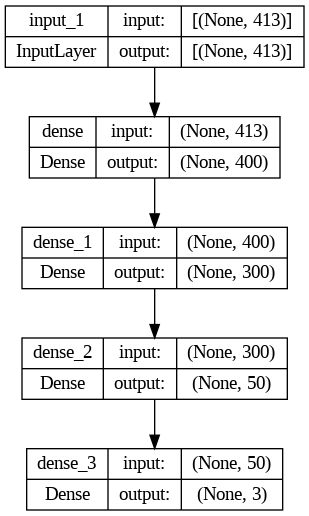

In [ ]:
plot_model(model, to_file='ann.png', show_shapes=True, show_layer_names=True)

In [10]:
history=model.fit(X_train,y_train,epochs=20,verbose=0,validation_data=(X_val,y_val),shuffle=True,batch_size=400)

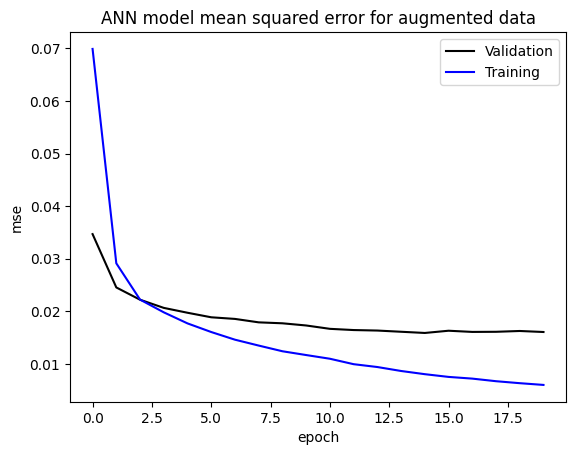

In [11]:
plt.plot(history.history['val_mean_squared_error'],"k",label="Validation")
plt.plot(history.history['mean_squared_error'],"b",label="Training")
plt.title('ANN model mean squared error for augmented data')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [47]:
print("Predict=",scaler.inverse_transform(model.predict(test)),"Real=",scaler.inverse_transform([y_val[12]]))

NameError: ignored

In [12]:
pred=[]
true=[]
for i in range(len(X_val)):
  test=np.expand_dims(X_val[i],axis=0)
  pred.append(scaler.inverse_transform(model.predict(test,verbose=0)))
  true.append((scaler.inverse_transform([y_val[i]])))

In [13]:
mse = tf.keras.losses.MeanSquaredError()
mse(true, pred).numpy()

0.33360192

In [14]:
truee=np.squeeze(true, 1)
predd=np.squeeze(pred, 1)

In [15]:
r2=tf.keras.metrics.R2Score()
r2.update_state(truee, predd)
result = r2.result()
result.numpy()  

0.48712078

In [ ]:
#model.save("annMod50.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3052: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CNN

In [ ]:
cnn = keras.Sequential([
        #layers.Rescaling(1./255),
        #Input([180, 180, 3]),
        Conv2D(9, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(45, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(90, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(180, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(3, activation='relu'),
])
cnn.compile(loss="mean_squared_error",optimizer="adam", metrics=["mean_squared_error"])

In [ ]:
history= cnn.fit(X_train,y_train,epochs=1,verbose=0,validation_data=(X_val,y_val),shuffle=True,batch_size=299)#400 for aug and 299 for orig

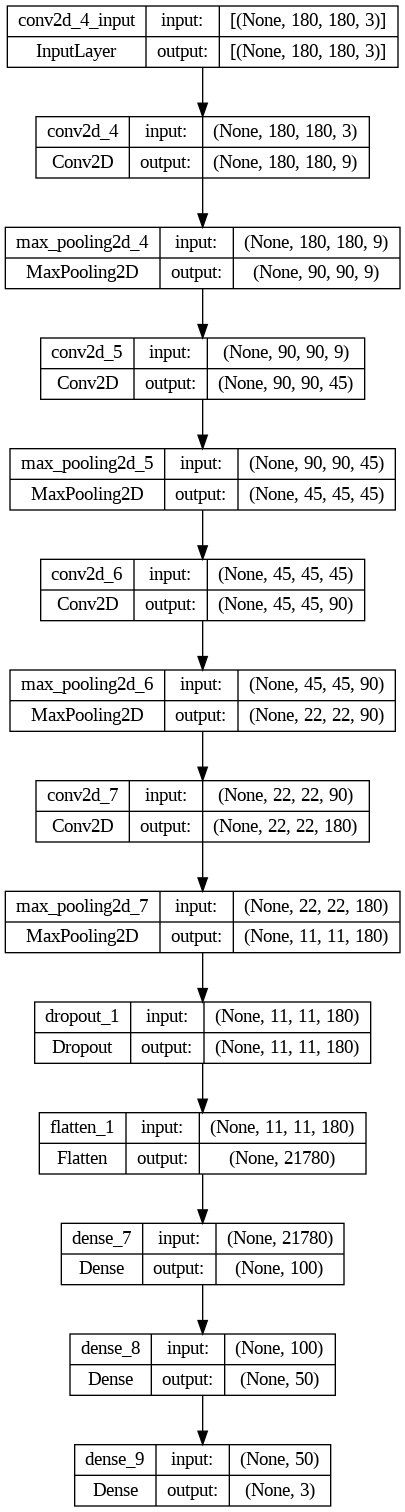

In [ ]:
plot_model(cnn, to_file='cnn.png', show_shapes=True, show_layer_names=True)

In [ ]:
history= cnn.fit(X_train,y_train,epochs=50,verbose=0,validation_data=(X_val,y_val),shuffle=True,batch_size=400)#400 for aug and 299 for orig

In [ ]:
plt.plot(history.history['val_loss'],"k",label="Validation")
plt.plot(history.history['loss'],"b",label="Training")
plt.title('CNN model loss for original data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

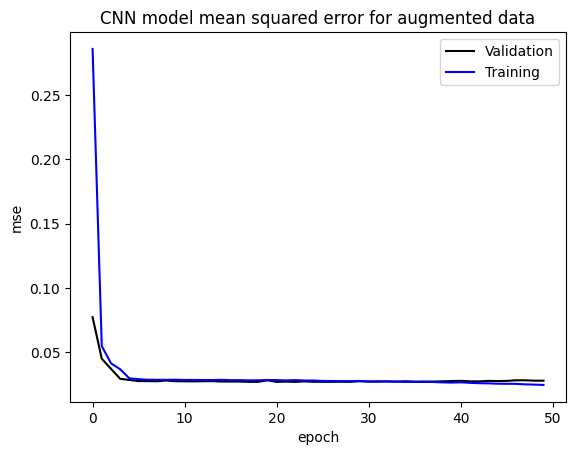

In [ ]:
plt.plot(history.history['val_mean_squared_error'],"k",label="Validation")
plt.plot(history.history['mean_squared_error'],"b",label="Training")
plt.title('CNN model mean squared error for augmented data')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
test=np.expand_dims(X_val[12],axis=0)
tesmse=[np.expand_dims(X_val[i],axis=0) for i in range(len(X_val))]
test.shape

(1, 180, 180, 3)

In [ ]:
pred=[]
true=[]
for i in range(len(X_val)):
  test=np.expand_dims(X_val[i],axis=0)
  pred.append(scaler.inverse_transform(cnn.predict(test,verbose=0)))
  true.append((scaler.inverse_transform([y_val[i]])))

In [ ]:
print("Predict=",scaler.inverse_transform(cnn.predict(test)),"Real=",scaler.inverse_transform([y_val[12]]))

1/1 [==============================] - 0s 239ms/step
Predict= [[2.113076  1.3695235 2.1285017]] Real= [[2.13179677 1.02       0.78753359]]


In [ ]:
#cnn.save("cnnOrig.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3052: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mse = tf.keras.losses.MeanSquaredError()
mse(true, pred).numpy()

0.90312076

In [ ]:
truee=np.squeeze(true, 1)
predd=np.squeeze(pred, 1)

In [ ]:
r2=tf.keras.metrics.R2Score()
r2.update_state(truee, predd)
result = r2.result()
result.numpy()  

-0.014885266